# 多变量线性回归

***
多变量的假设 h 表示为：\\[{{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 
这个公式中有n+1个参数和n个变量，为了使得公式能够简化一些，引入${{x}_{0}}=1$, $x = {[x_0, x_1, x_2, x_3, ..., x_n]}^T$
此时模型中的参数是一个n+1维的向量，任何一个训练实例也都是n+1维的向量，特征矩阵X的维度是 m*(n+1)。 
因此公式可以简化为：${{h}_{\theta }}\left( x \right)={{\theta }^{T}}x$，其中上标T代表矩阵转置。


使用向量化表示:
预测$h = X{\theta}$. 

会用到单变量线性回归中定义的一些函数. 从util.py文件中引入.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from util import *

C:\Users\Alex\Anaconda3\envs\MachineLearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 1. 读取数据

In [2]:
raw_data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])
raw_data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### 可视化数据

从图中看出, 散点的分布基本在一个平面上. 因此考虑使用线性回归.

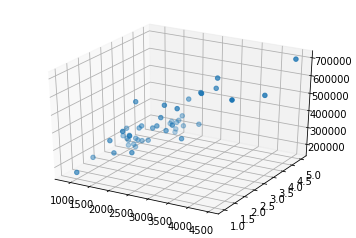

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(raw_data.square, raw_data.bedrooms, raw_data.price)

## 2. 准备数据

### 标准化数据

对于特征差异较大的样本需要进行特征值缩放. 

最简单的方法是令：$x =  \frac{x - {\mu}}{\sigma}$

其中$\mu$是平均值，${\sigma}$是标准差。

In [4]:
def normalize_feature(df):
    """Apply normalization to all columns"""
    return df.apply(lambda column: (column - column.mean()) / column.std()) # apply standard score 

In [5]:
data = normalize_feature(raw_data)
X = get_X(data)
y = get_y(data)

### 设置训练参数

In [6]:
alpha = 0.01 # learning rate
theta = np.zeros(X.shape[1]) # X.shape[1]：number of features
epoch = 500 # number of iteration

## 3. 开始训练

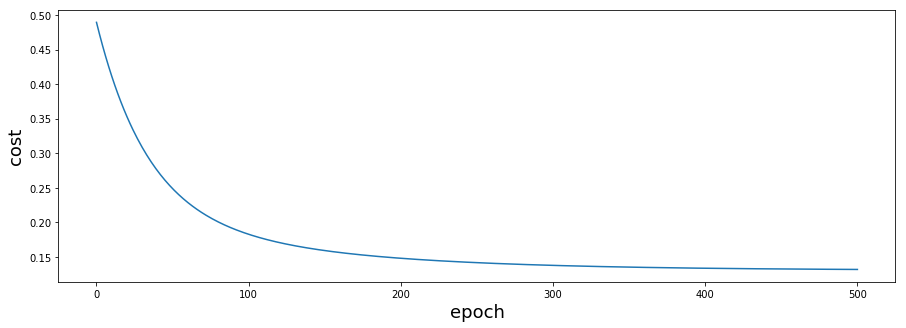

In [7]:
final_theta, cost_data = batch_gradient_descent(theta, X, y, epoch, alpha=alpha)

fig = plt.figure(figsize=(15, 5))
ax = plt.subplot(111)
ax.plot(cost_data)
plt.xlabel('epoch', fontsize=18)
plt.ylabel('cost', fontsize=18)
plt.show()

### 4. 看一看结果

最终theta的值:  [-1.18994649e-16  8.30383883e-01  8.23982853e-04]


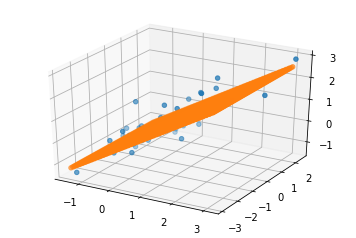

In [8]:
print('最终theta的值: ', final_theta)
# draw regression function along with raw data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.square, data.bedrooms, data.price)
_x = np.arange(data.square.min(), data.square.max(), 0.1)
_y = np.arange(data.bedrooms.min(), data.bedrooms.max(), 0.1)
xv, yv = np.meshgrid(_x, _y)
zv = final_theta[0] + final_theta[1] * xv + final_theta[2] * yv
ax.scatter(xv, yv, zv)